In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline


In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


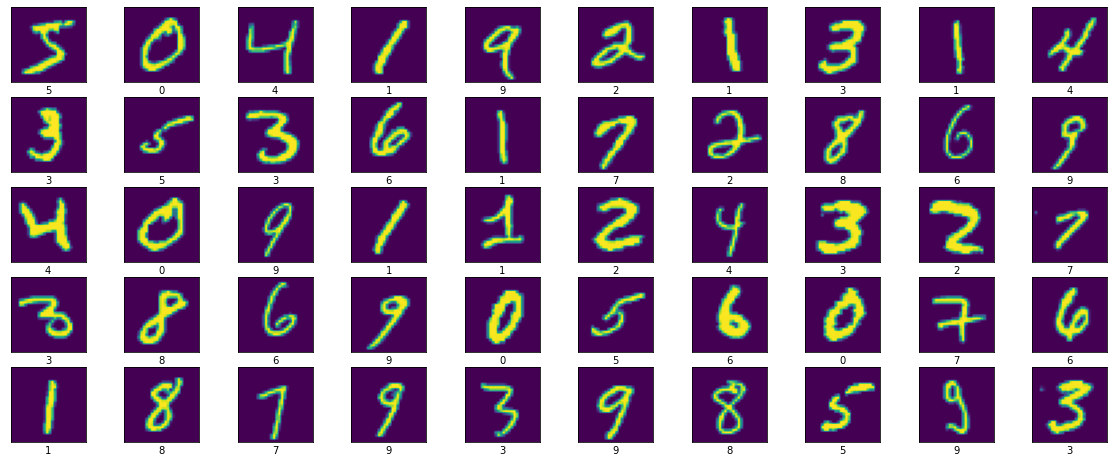

In [7]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i]])
    
plt.show()


In [8]:
X_train, X_test = X_train.reshape([-1,28,28,1]), X_test.reshape([-1,28,28,1])
model = keras.Sequential([

    keras.Input(shape=(28,28,1)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    
    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [9]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=28)


Epoch 1/5
1715/1715 [==============================] - 19s 11ms/step - loss: 0.8737 - accuracy: 0.8438 - val_loss: 0.0901 - val_accuracy: 0.9741
Epoch 2/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.0850 - accuracy: 0.9737 - val_loss: 0.0702 - val_accuracy: 0.9802
Epoch 3/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.0700 - accuracy: 0.9785 - val_loss: 0.0701 - val_accuracy: 0.9812
Epoch 4/5
1715/1715 [==============================] - 18s 11ms/step - loss: 0.0585 - accuracy: 0.9821 - val_loss: 0.1175 - val_accuracy: 0.9687
Epoch 5/5
1715/1715 [==============================] - 21s 12ms/step - loss: 0.0535 - accuracy: 0.9828 - val_loss: 0.0729 - val_accuracy: 0.9830


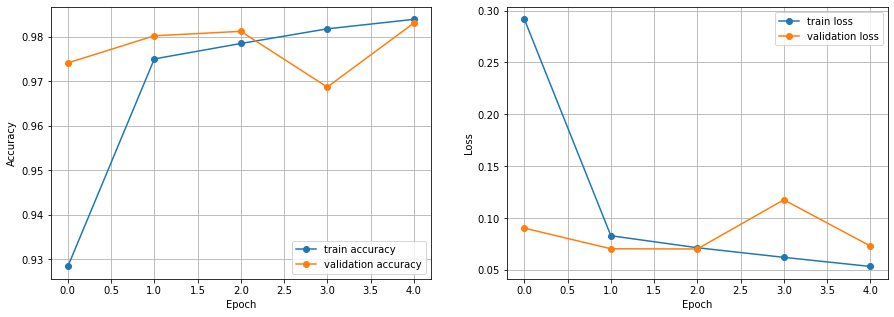

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)


313/313 [==============================] - 1s 3ms/step - loss: 0.0627 - accuracy: 0.9842

Test Accuracy: 0.9842000007629395

Test Loss: 0.0627395287156105


In [12]:
predictions = model.predict(X_test)
predictions[0]


array([8.7943053e-13, 8.2936634e-07, 2.1968162e-07, 2.2187574e-09,
       4.4118691e-13, 1.6651441e-14, 2.6357414e-15, 9.9999869e-01,
       1.3010962e-11, 1.8714449e-07], dtype=float32)

In [13]:
np.argmax(predictions[0])

7

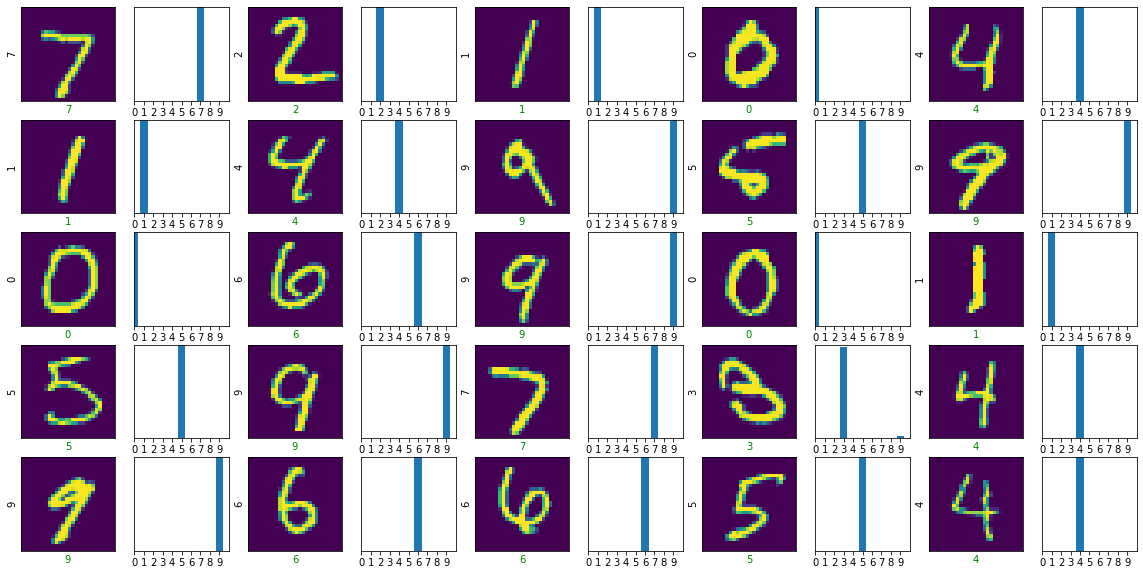

In [14]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i]])
    if Y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

In [15]:
#With data normalization, the data is more organised and decreases redundacy or duplicate data

In [26]:
tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop', **kwargs
)

NameError: name 'kwargs' is not defined